## Practice with a Partner: (20 minutes)

We have a interesting data set that study our brain. In this exercise we are trying to use multiple features to predict brain **weight**.

Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to the Size of the Head", Biometrika, Vol. 4, pp105-123

Description: Brain weight (grams) and head size (cubic cm) for 237 adults classified by gender and age group.

Variables/Columns:

GENDER: Gender  Male or Female  
AGE: Age Range  20-46 or 46+  
SIZE: Head size ($cm^3$)  21-24  
WEIGHT: Brain weight (grams)  29-32 

### Objectives:
- Follow the standard workflow, such as checking the data type, cleaning the data, prepare data for regression model.
- Create dummy variables for the categorical data using either Pandas ```pd.get_dummy()``` or sklearn ```OneHotEncoder()```.
- Scale the data using sklearn ```standardScaler()```.
- Fit the data in multiple linear regression and evaluate the results.
- Evaluate the model using different metrics, $R^2$, MAE, MSE.

Follow the instructions and complete a coding exercise with a partner in the class (in the random breakout room). Instructor will go into the rooms to help answering questions from students.

In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics

In [2]:
# Read the csv file into a pandas DataFrame
brain = pd.read_csv('data/brain_categorical.csv')
brain.head()

,gender,age,size,weight
0,Male,20-46,4512,1530
1,Male,20-46,3738,1297
2,Male,20-46,4261,1335
3,Male,20-46,3777,1282
4,Male,20-46,4177,1590


### Step 1: Checking the data

In [3]:
# Use the .info() method to check the data set
brain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gender  237 non-null    object
 1   age     237 non-null    object
 2   size    237 non-null    int64 
 3   weight  237 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 7.5+ KB


Question:

1. Do we have any missing data?
2. What are the data type for each variable (column)?
3. Do we need to clean the data?

In [4]:
# Use the .describe() method to print the statistical summary of the data set
brain.describe()

,size,weight
count,237.000000,237.000000
mean,3633.991561,1282.873418
std,365.261422,120.340446
min,2720.000000,955.000000
25%,3389.000000,1207.000000
50%,3614.000000,1280.000000
75%,3876.000000,1350.000000
max,4747.000000,1635.000000


Question:

1. Why are we see the statistical summary returning only two columns (size and weight)?

Let's check the count of each category (level) in both categorical columns.

In [5]:
# Count of male and female
brain['gender'].value_counts()

Male      134
Female    103
Name: gender, dtype: int64

In [6]:
# Count of different age groups
brain['age'].value_counts()

46+      127
20-46    110
Name: age, dtype: int64

Next, let's create the predictors and target dataframes.

Example:

``` Python
# Create predictors dataframe
predictors = data.drop('target_name', axis=1)

# Create target dataframe
target = data['target_name']
```

In [7]:
# Create the predictors and target dataframes
predictors = brain.drop('weight', axis = 1)
target = brain['weight']

### Step 2: Create dummy variables for categorical data

Now that we have studied the data set and knowing that there are two categorical variables (columns). We need to create dummy columns.

Feel free to use either *Pandas* ```pd.get_dummies()``` or *sklearn* ```OneHotEncoder()``` for this task.

Example:

``` Python
# Create dummy columns with Pandas function
data_encoded = pd.get_dummies(data, drop_first = True)

# Create dummy columns with sklearn OneHotEncoder
ohe = OneHotEncoder(drop = 'first')
data_trans = ohe.fit_transform(data['categorical_columns'])
data_encoded = pd.DataFrame(data_trans.todense(), columns = ohe.get_feature_names())
data_encoded.join(data['numerical_columns'])
data_encoded
```

Note: *Remember when we are fitting / training the data with the OLS regression model, we need to exclude one level from each categorical variable as the reference level.*

In [8]:
# Create the categorical columns with Pandas DataFrame
predictors_encoded = pd.get_dummies(predictors, drop_first = True)
print(predictors_encoded)

     size  gender_Male  age_46+
0    4512            1        0
1    3738            1        0
2    4261            1        0
3    3777            1        0
4    4177            1        0
..    ...          ...      ...
232  3214            0        1
233  3394            0        1
234  3233            0        1
235  3352            0        1
236  3391            0        1

[237 rows x 3 columns]


In [9]:
# Create the categorical columns with sklearn OneHotEncoder (optional)
ohe = OneHotEncoder(drop = 'first')
predictors_trans = ohe.fit_transform(predictors[['gender', 'age']])
predictors_encoded = pd.DataFrame(predictors_trans.todense(), columns = ohe.get_feature_names())
predictors_encoded = predictors_encoded.join(predictors['size'])
print(predictors_encoded)

     x0_Male  x1_46+  size
0        1.0     0.0  4512
1        1.0     0.0  3738
2        1.0     0.0  4261
3        1.0     0.0  3777
4        1.0     0.0  4177
..       ...     ...   ...
232      0.0     1.0  3214
233      0.0     1.0  3394
234      0.0     1.0  3233
235      0.0     1.0  3352
236      0.0     1.0  3391

[237 rows x 3 columns]


Check the encoded predictors dataframe to make sure the dummy columns are created and the original columns are removed.

Let's run the sklearn OLS with the encoded data and see the results.

In [10]:
# Create the OLS Regression object
lr = LinearRegression()

# Fit the training data using the OLS regression object
lr.fit(predictors_encoded, target)

LinearRegression()

In [11]:
# Extract the coefficient values using the .coef_ attribute
lr.coef_

array([ 22.5432537 , -23.96844543,   0.24421175])

In [12]:
# Extract the intercept coefficient
lr.intercept_

395.507858056101

### Step 3: Scaling the data

If we look at the estimated coefficents, there are two relatively large coefficients (gender_male and age_46+) and a cofficient (size) less than 1. 

Remember, we can use the sklearn ```StandardScaler()``` to standardize the data, so the variables will be on the same scale.

Example:

``` Python
# Create the StandardScaler object
ss = StandardScaler()

## Apply it to our data by using the .fit() and .transform() methods
data_scaler = ss.fit(data)
data_scaled = data_scaler.transform(data)
```

Note: *The StandardScaler is expecting a 2D array for input. If we are scaling our target variable, we need to reshape the dataframe using ```target.values.reshape(-1, 1)``` in the .fit() and .transfrom() functions.*

In [13]:
# Create the StandardScaler object
ss = StandardScaler()

# Apply it the predictors and target by using the .fit() and .transform() methods
predictors_scaler = ss.fit(predictors_encoded)
predictors_scaled = predictors_scaler.transform(predictors_encoded)

target_scaler = ss.fit(target.values.reshape(-1, 1))
target_scaled = target_scaler.transform(target.values.reshape(-1, 1))

# Create the scaled dataframes
predictors_scaled = pd.DataFrame(predictors_scaled, columns = ['male', '46+', 'size'])
target_scaled = pd.DataFrame(target_scaled, columns = ['weight'])

# Print the scaled predictors and target
print(predictors_scaled.head())
print(target_scaled.head())

       male       46+      size
0  0.876731 -1.074498  2.408868
1  0.876731 -1.074498  0.285353
2  0.876731 -1.074498  1.720235
3  0.876731 -1.074498  0.392352
4  0.876731 -1.074498  1.489776
     weight
0  2.057908
1  0.117637
2  0.434076
3 -0.007273
4  2.557549


### Step 5: Fitting the scaled data to multiple linear regression

Let's run the sklearn multiple regrssion with the scaled data again. 

In [14]:
# Create the OLS Regression object
lr = LinearRegression()

# Fit the training data using the OLS regression object
lr.fit(predictors_scaled, target_scaled)

LinearRegression()

In [15]:
# Extract the coefficient values using the .coef_ attribute
lr.coef_

array([[ 0.09305631, -0.09953969,  0.74123982]])

In [16]:
# Extract the intercept coefficient
lr.intercept_

array([-2.89583504e-16])

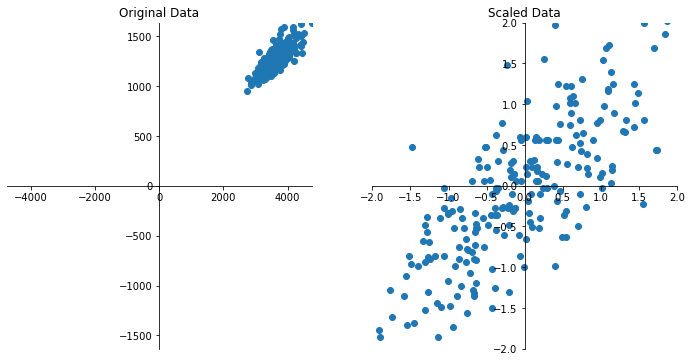

In [17]:
# Visualize the scaling effect
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = predictors_encoded['size'].max()
maxy = target.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(predictors_encoded['size'], target)
axes2.scatter(predictors_scaled['size'], target_scaled['weight'])
plt.savefig('img/standard_scaling.png')

### Step 6: Evaluate the model

Let's evaluate the model with different metrics, such as $R^2$, MAE, and MSE.

In [18]:
# Extract the R^2 score of the model
lr.score(predictors_scaled, target_scaled)

0.6528346387526653

In [19]:
# Check the mean absolute error (MAE)
metrics.mean_absolute_error(target_scaled, lr.predict(predictors_scaled))

0.46094178757136256

In [20]:
# Check the mean squared error (MSE)
metrics.mean_squared_error(target_scaled, lr.predict(predictors_scaled))

0.34716536124733455

**Final Challenge:**

Let's use statsmodel OLS regression to confirm our results from the previous exercise. Run two OLS regression, one with the encoded data and one with the scaled data.

Check the coefficient and $R^2$ values. They should be the same as the sklearn OLS regression models.  If they are not, something is wrong!!

In [21]:
import statsmodels.api as sm

In [22]:
# Create the OLS model and fit the encoded data
model = sm.OLS(target, sm.add_constant(predictors_encoded)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     146.0
Date:                Sun, 04 Jul 2021   Prob (F-statistic):           2.94e-53
Time:                        22:05:44   Log-Likelihood:                -1345.7
No. Observations:                 237   AIC:                             2699.
Df Residuals:                     233   BIC:                             2713.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        395.5079     52.999      7.463      0.000     291.090     499.926
x0_Male       22.5433     11.058      2.039      0.043       0.757      44.329
x1_46+       -23.9684      9.481     -2.528      0.012     -42.647      -5.290
size           0.2442      0.015     16.212      0.000       0.215       0.274
==============================================================================
Omnibus:                        7.989   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                8.255
Skew:                           0.357   Prob(JB):                       0.0161
Kurtosis:                       3.571   Cond. No.                     4.20e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
# Create the OLS model and fit the scaled data
model = sm.OLS(target_scaled, sm.add_constant(predictors_scaled)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     146.0
Date:                Sun, 04 Jul 2021   Prob (F-statistic):           2.94e-53
Time:                        22:05:44   Log-Likelihood:                -210.92
No. Observations:                 237   AIC:                             429.8
Df Residuals:                     233   BIC:                             443.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.388e-17      0.039   -3.6e-16      1.000      -0.076       0.076
male           0.0931      0.046      2.039      0.043       0.003       0.183
46+           -0.0995      0.039     -2.528      0.012      -0.177      -0.022
size           0.7412      0.046     16.212      0.000       0.651       0.831
==============================================================================
Omnibus:                        7.989   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                8.255
Skew:                           0.357   Prob(JB):                       0.0161
Kurtosis:                       3.571   Cond. No.                         1.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""